### 1. Dataset Creation

In [1]:
import pandas as pd
import numpy as np

# Setting a random seed for reproducibility
np.random.seed(42)

# Define the number of samples
num_samples = 400000

# Generate synthetic data
data = {
    'Name': [f'Patient_{i+1}' for i in range(num_samples)],
    'Age': np.random.randint(18, 90, num_samples),  # Ages between 18 and 90
    'Gender': np.random.choice(['Male', 'Female', 'Other'], num_samples),
    'Race': np.random.choice(['Asian', 'Black', 'Hispanic', 'White', 'Other'], num_samples),
    'SideEffect': np.random.choice(['Nausea', 'Dizziness', 'Headache', 'Fatigue', 'None'], num_samples)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the dataset to a CSV file
df.to_csv('synthetic_patient_data.csv', index=False)
print("Synthetic dataset created with 400,000 entries and saved as 'synthetic_patient_data.csv'")


Synthetic dataset created with 400,000 entries and saved as 'synthetic_patient_data.csv'


### Step 2: Load and Explore the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_patient_data.csv')

# Display basic information about the dataset
print("Dataset Info:")
df.info()

# Display the first few rows of the dataset
print("\nSample Data:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Name        400000 non-null  object
 1   Age         400000 non-null  int64 
 2   Gender      400000 non-null  object
 3   Race        400000 non-null  object
 4   SideEffect  320119 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.3+ MB

Sample Data:
        Name  Age  Gender      Race SideEffect
0  Patient_1   69   Other     Asian     Nausea
1  Patient_2   32    Male  Hispanic  Dizziness
2  Patient_3   89    Male     Black   Headache
3  Patient_4   78  Female     Black     Nausea
4  Patient_5   38    Male     Asian    Fatigue


### Step 2: Data Cleaning and Preprocessing
We will encode categorical columns (Gender and Race) using pd.get_dummies and scale the Age feature.

In [4]:
from sklearn.preprocessing import StandardScaler

# Drop the 'Name' column as it's not needed for classification
df = df.drop('Name', axis=1)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Race'], drop_first=True)

# Separate features and target variable
X = df.drop('SideEffect', axis=1)
y = df['SideEffect']

# Scale the 'Age' column
scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])

# Save the scaler for future use
import joblib
joblib.dump(scaler, 'age_scaler.pkl')
print("Data preprocessing completed.")


Data preprocessing completed.


In [5]:
df.head(10)

,Age,SideEffect,Gender_Male,Gender_Other,Race_Black,Race_Hispanic,Race_Other,Race_White
0,69,Nausea,False,True,False,False,False,False
1,32,Dizziness,True,False,False,True,False,False
2,89,Headache,True,False,True,False,False,False
3,78,Nausea,False,False,True,False,False,False
4,38,Fatigue,True,False,False,False,False,False
5,41,NaN,True,False,False,False,False,False
6,20,Dizziness,False,True,False,False,True,False
7,39,NaN,False,False,True,False,False,False
8,70,Dizziness,False,True,False,False,False,True
9,19,Fatigue,False,True,False,False,False,False


### Step 3: Encode Target Variable and Split the Data
Encode the target variable (SideEffect) and split the data into training and testing sets.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Save the encoder for future use
joblib.dump(label_encoder, 'side_effects_encoder.pkl')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")


Data split into training and testing sets.


### Step 4: Build and Train the Model
We'll use a RandomForestClassifier, which is robust and often effective for classification tasks.

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Save the model for future use
joblib.dump(model, 'drug_side_effect_classifier.pkl')
print("Model training completed and saved as 'drug_side_effect_classifier.pkl'.")


Model training completed and saved as 'drug_side_effect_classifier.pkl'.


### Step 5: Model Evaluation
Evaluate the model using accuracy and cross-validation.

In [10]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Display classification report
# Convert label_encoder.classes_ to strings to avoid the TypeError
class_names = [str(cls) for cls in label_encoder.classes_]

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Cross-validation scores
cv_scores = cross_val_score(model, X, y_encoded, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Test Accuracy: 20.03%

Classification Report:
              precision    recall  f1-score   support

   Dizziness       0.20      0.20      0.20     15970
     Fatigue       0.20      0.19      0.19     15968
    Headache       0.20      0.20      0.20     15967
      Nausea       0.20      0.20      0.20     15835
         nan       0.21      0.20      0.20     16260

    accuracy                           0.20     80000
   macro avg       0.20      0.20      0.20     80000
weighted avg       0.20      0.20      0.20     80000


Cross-validation scores: [0.2       0.2007375 0.2001625 0.199275  0.1995875]
Mean cross-validation score: 0.1999525


### Testing with New Data
After training, you may want to test the model with new data.

In [11]:
import numpy as np

# Example new data (replace with actual new data as per your scenario)
new_data = pd.DataFrame({
    'Age': [45],  # Sample age
    'Gender_Male': [1],  # Assume male gender
    'Gender_Other': [0],
    'Race_Black': [0],
    'Race_Hispanic': [0],
    'Race_Other': [0],
    'Race_White': [1]  # Assume White race
})

# Scale 'Age' using the previously saved scaler
new_data['Age'] = scaler.transform(new_data[['Age']])

# Predict the side effect
prediction = model.predict(new_data)
predicted_side_effect = label_encoder.inverse_transform(prediction)
print(f"Predicted Side Effect: {predicted_side_effect[0]}")


Predicted Side Effect: Dizziness


### Class Distribution
Show the distribution of the target variable (side effects) to understand if the classes are balanced.

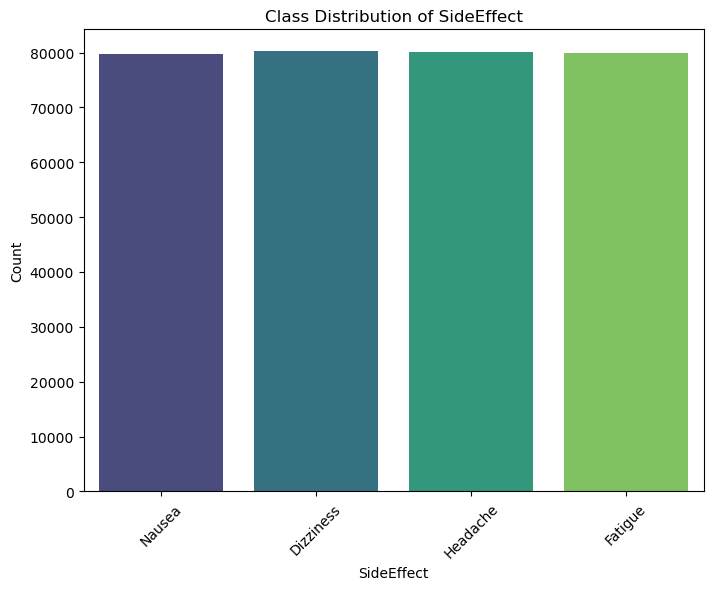

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='SideEffect', data=df, palette='viridis')
plt.title('Class Distribution of SideEffect')
plt.xlabel('SideEffect')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\bobna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bobna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bobna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bobna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

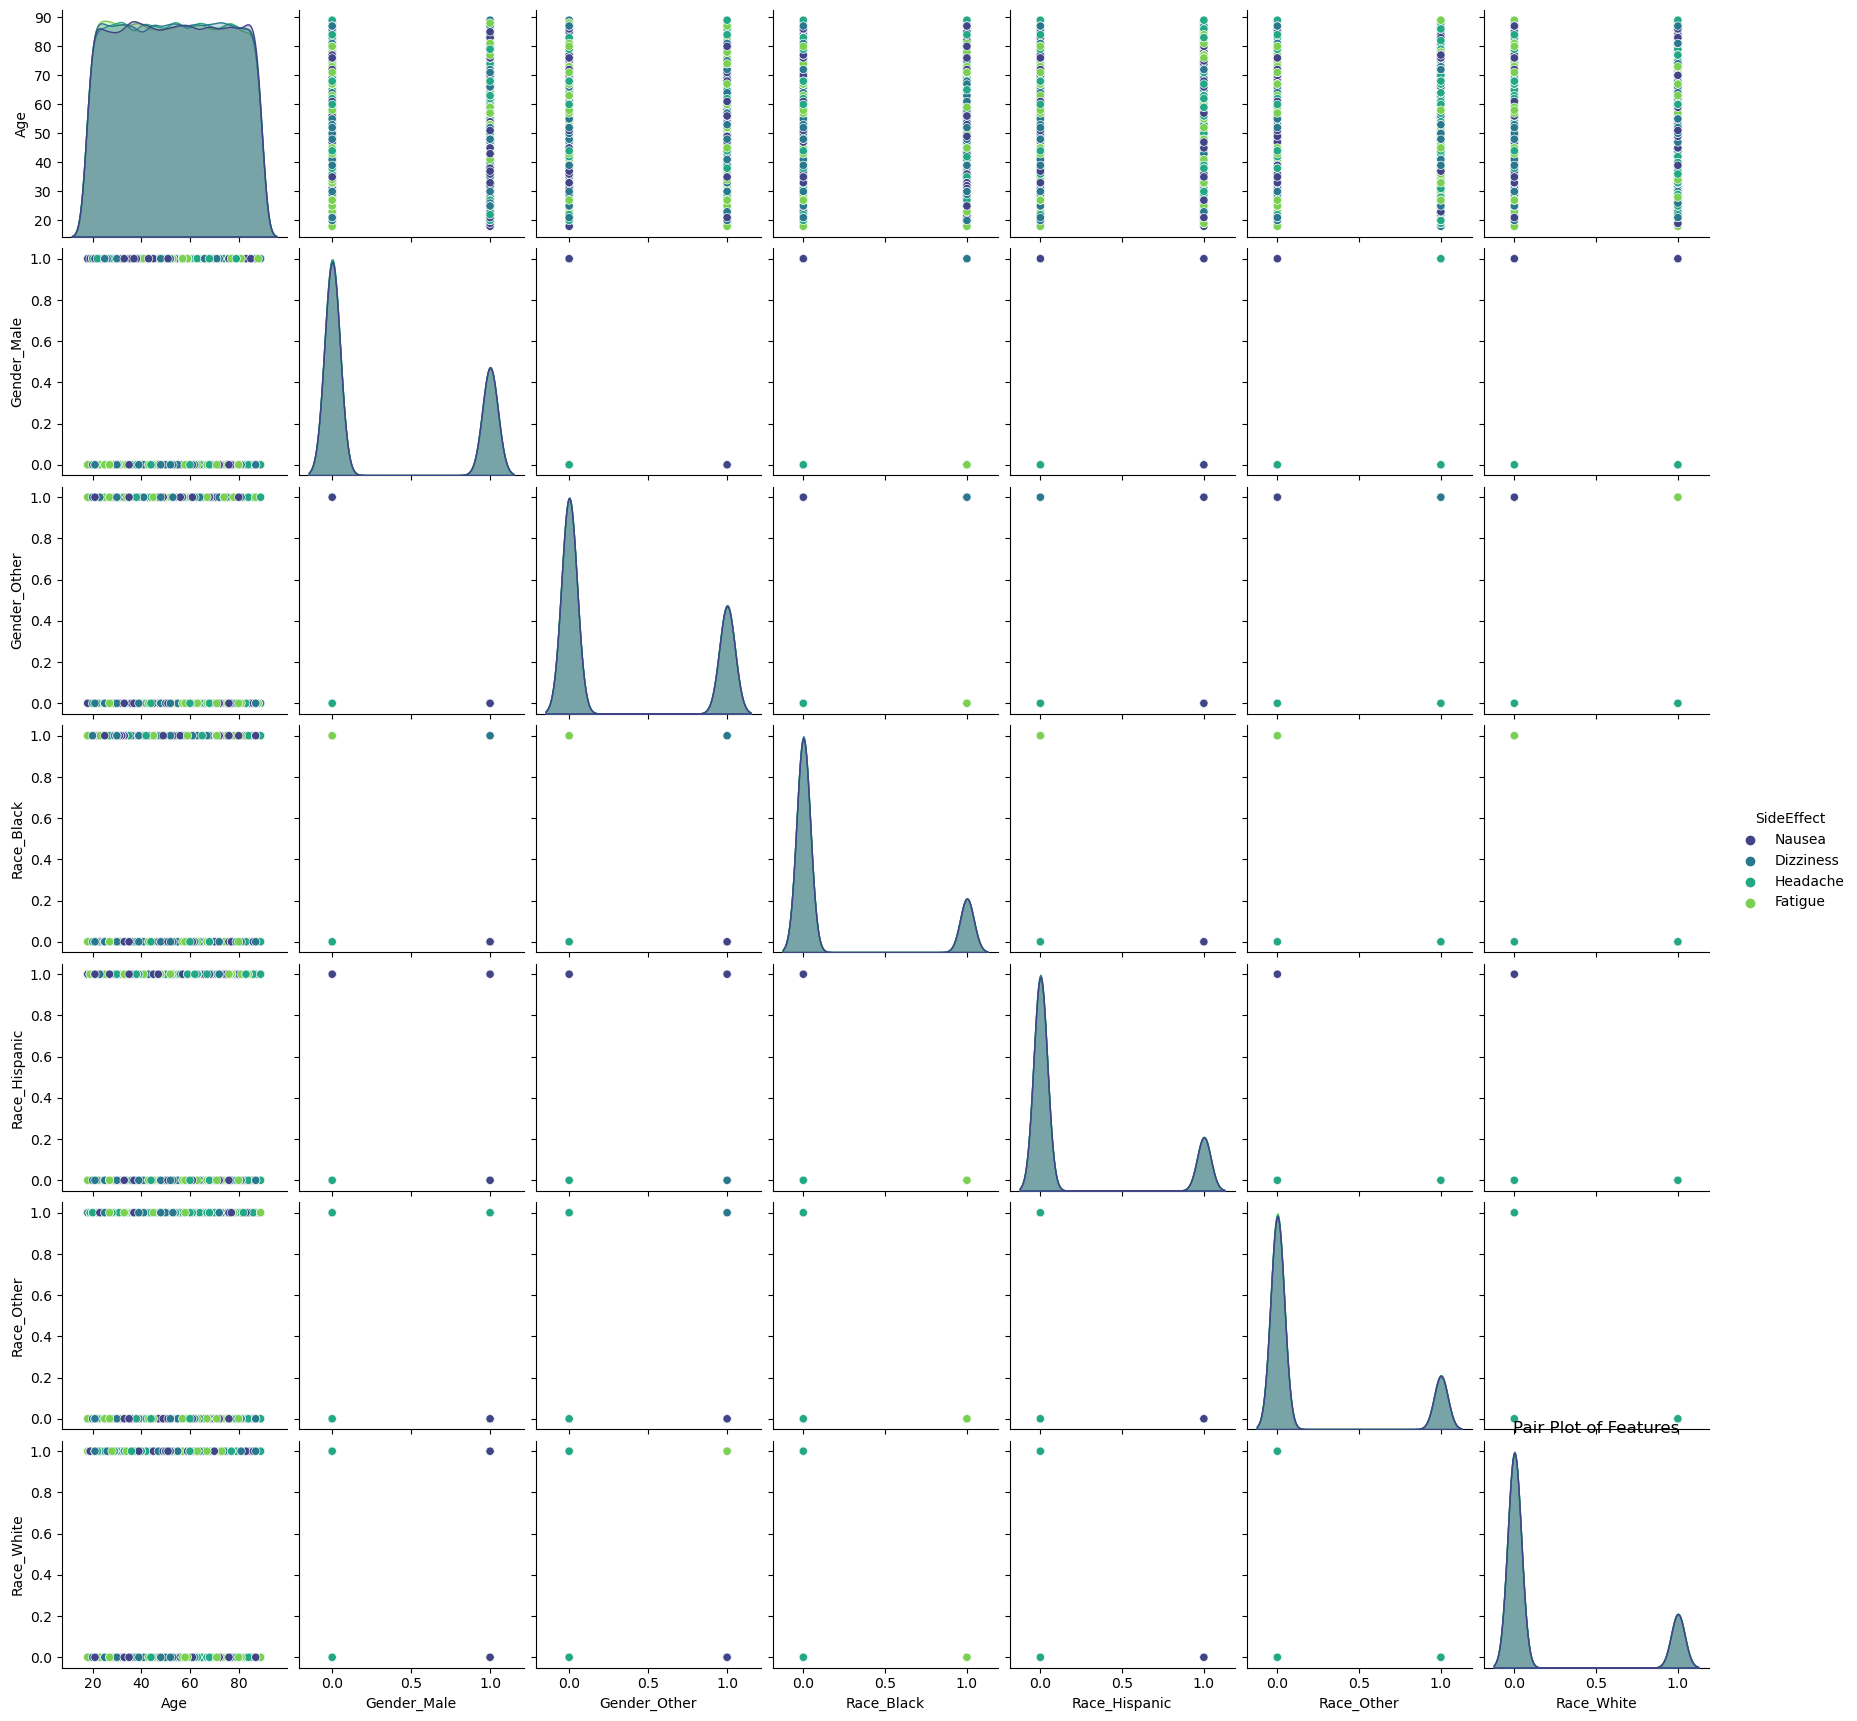

In [30]:
sns.pairplot(df, hue='SideEffect', palette='viridis')
plt.title('Pair Plot of Features')
plt.show()


### Age Distribution by Side Effect
Understand the distribution of patient age across different side effects.

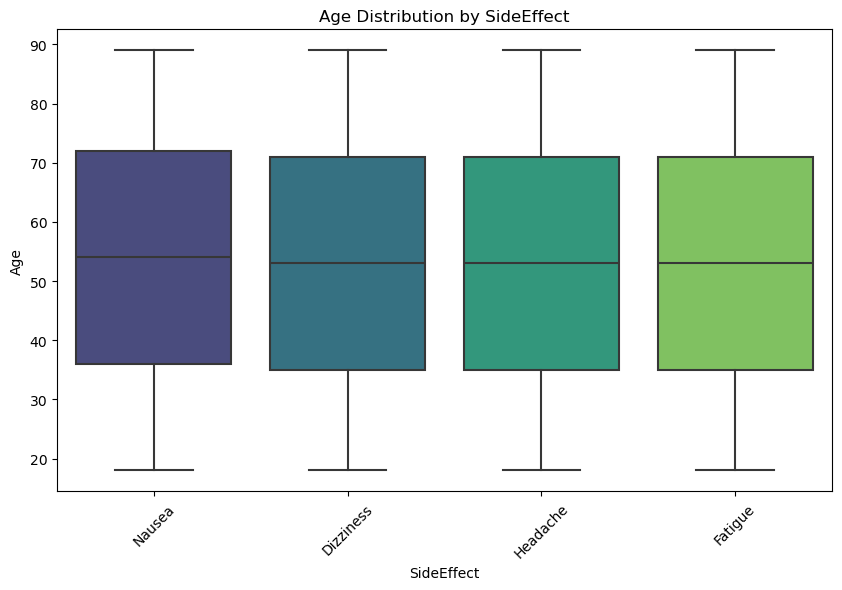

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SideEffect', y='Age', data=df, palette='viridis')
plt.title('Age Distribution by SideEffect')
plt.xlabel('SideEffect')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


### Accuracy vs. Hyperparameter
If you perform hyperparameter tuning, plot accuracy against different values of a hyperparameter (e.g., max depth for a decision tree).

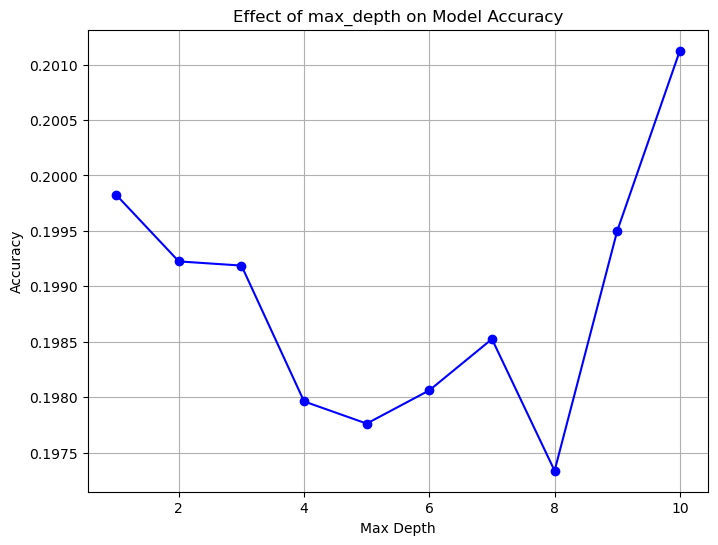

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Define a range of max_depth values
max_depths = range(1, 11)
accuracies = []

for depth in max_depths:
    temp_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    temp_model.fit(X_train, y_train)
    accuracies.append(temp_model.score(X_test, y_test))

# Visualize the effect of max_depth on accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(max_depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Effect of max_depth on Model Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


### Model Evaluation

Accuracy: 0.20
Precision: 0.20
Recall: 0.20
F1-score: 0.20

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20     15970
           1       0.20      0.19      0.19     15968
           2       0.20      0.20      0.20     15967
           3       0.20      0.20      0.20     15835
           4       0.21      0.20      0.20     16260

    accuracy                           0.20     80000
   macro avg       0.20      0.20      0.20     80000
weighted avg       0.20      0.20      0.20     80000



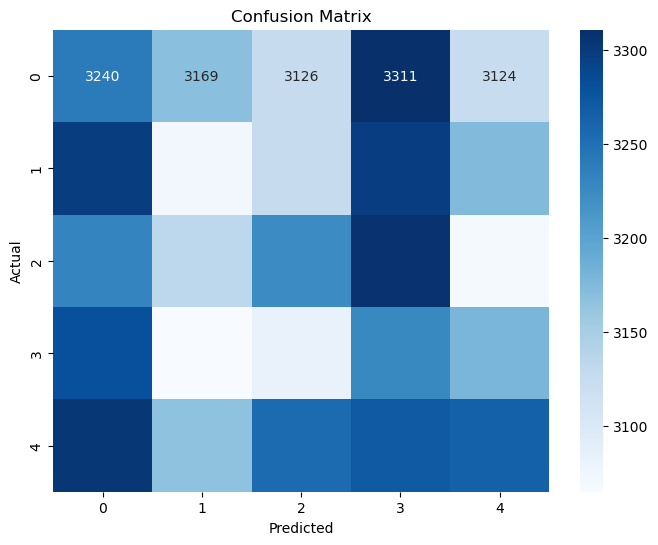

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the following variables:
# y_test: Actual target labels from the test set
# y_pred: Predicted labels by your model

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 2. Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
